<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.243250,58.249291,32.827366,64.861293,0.003297,196.184497,196.181629,0.002868
1,0.0,1.0,54.714233,45.299975,62.809630,57.522738,-0.002133,230.344442,230.346879,-0.002437
2,0.0,2.0,55.042821,74.070405,75.235424,91.979596,0.003404,306.331651,306.327369,0.004281
3,0.0,3.0,45.574064,69.044858,88.315394,50.841209,-0.004497,263.771029,263.776318,-0.005289
4,0.0,4.0,40.647601,93.267619,53.213807,63.113079,-0.000937,260.241169,260.242337,-0.001169
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.505072,95.895363,93.437295,49.629014,0.003752,288.470495,288.465518,0.004977
29996,999.0,26.0,60.945953,85.838737,43.195882,50.972707,-0.002132,250.951148,250.952440,-0.001292
29997,999.0,27.0,83.742910,46.652753,27.471979,30.993397,0.004508,198.865547,198.863646,0.001901
29998,999.0,28.0,59.770743,68.250215,75.961114,49.457087,-0.003673,263.435486,263.440048,-0.004562


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.243250,58.249291,32.827366,64.861293,0.003297,196.184497,196.181629,0.002868
1,0.0,1.0,54.714233,45.299975,62.809630,57.522738,-0.002133,230.344442,230.346879,-0.002437
2,0.0,2.0,55.042821,74.070405,75.235424,91.979596,0.003404,306.331651,306.327369,0.004281
3,0.0,3.0,45.574064,69.044858,88.315394,50.841209,-0.004497,263.771029,263.776318,-0.005289
4,0.0,4.0,40.647601,93.267619,53.213807,63.113079,-0.000937,260.241169,260.242337,-0.001169
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.505072,95.895363,93.437295,49.629014,0.003752,288.470495,288.465518,0.004977
29996,999.0,26.0,60.945953,85.838737,43.195882,50.972707,-0.002132,250.951148,250.952440,-0.001292
29997,999.0,27.0,83.742910,46.652753,27.471979,30.993397,0.004508,198.865547,198.863646,0.001901
29998,999.0,28.0,59.770743,68.250215,75.961114,49.457087,-0.003673,263.435486,263.440048,-0.004562


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

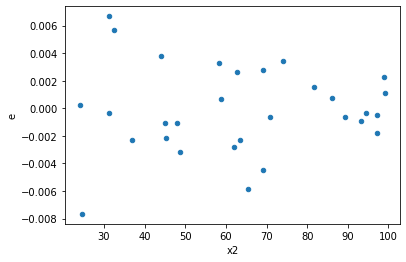

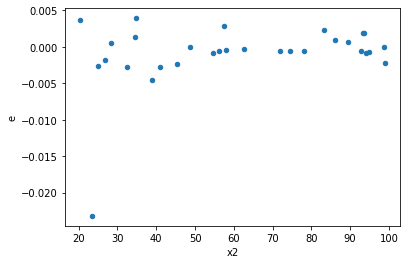

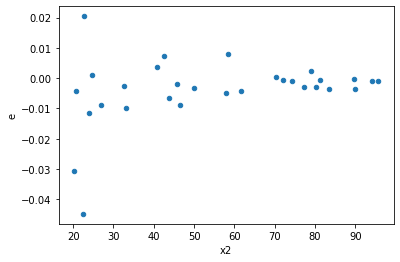

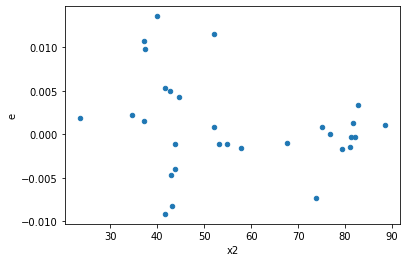

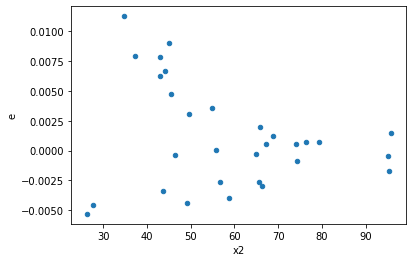

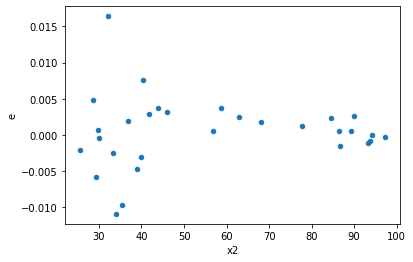

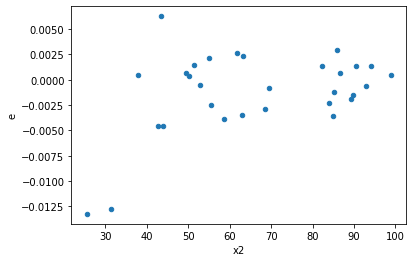

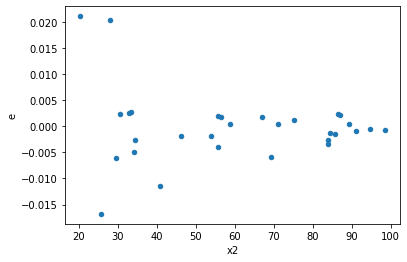

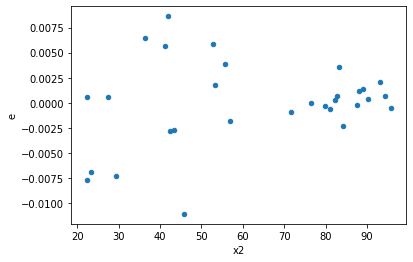

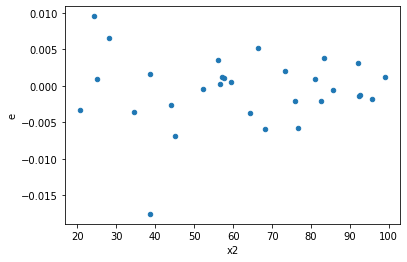

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,13.0,7.023688619153196e-06,0.00042370267759785275,7.804098465725773e-07,3.2592513661373285e-05,41.763329620344834,7.678204161365443e-08,0.9999999616089792,3.8391020806827214e-08,Reject001=0 : Heteroscedasticity
2.0,16.0,6.0,0.00134678669252099,0.0007199233584938055,8.417416828256187e-05,0.00011998722641563425,1.4254637600083262,0.6946336423539328,0.6526831788230336,0.3473168211769664,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,9.818304349253832e-05,0.0004377525998105184,9.818304349253832e-06,3.64793833175432e-05,3.7154463764728933,0.03507694564497732,0.9824615271775113,0.01753847282248866,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,0.00012583933140307603,0.0004653447442857837,1.3982147933675114e-05,3.57957495604449e-05,2.5601037644747784,0.1207914484852417,0.9396042757573791,0.06039572424262085,Reject001=1 : Homoscedasticity
8.0,16.0,6.0,0.0003145694701596608,0.00015192290673497722,1.96605918849788e-05,2.5320484455829536e-05,1.287880070140464,0.7999838009373623,0.6000080995313188,0.39999190046868116,Reject001=1 : Homoscedasticity
13.0,15.0,7.0,0.00068275834394137,0.0004323377291781888,4.551722292942466e-05,6.176253273974126e-05,1.3569046783786716,0.7100366362641783,0.6449816818679108,0.3550183181320892,Reject001=1 : Homoscedasticity
17.0,11.0,11.0,0.0001821854328911718,0.000333490919292417,1.6562312081015617e-05,3.0317356299310637e-05,1.8305026587478448,0.3305732348411714,0.8347133825794143,0.1652866174205857,Reject001=1 : Homoscedasticity
18.0,11.0,11.0,6.728833422704735e-05,0.00020238098210766415,6.11712129336794e-06,1.839827110069674e-05,3.007668185465568,0.08118802535653602,0.959405987321732,0.04059401267826801,Reject001=1 : Homoscedasticity
21.0,10.0,12.0,0.00014676667914821683,0.0003389519473522162,1.4676667914821683e-05,2.8245995612684684e-05,1.9245509795966427,0.2816478727625098,0.8591760636187451,0.1408239363812549,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,9.0,0.00017808677825995647,8.497495507070399e-05,1.3698982943073574e-05,9.441661674522666e-06,0.6892235513948517,0.5249402121532805,Reject001=1 : Homoscedasticity
1.0,9.0,13.0,7.023688619153196e-06,0.00042370267759785275,7.804098465725773e-07,3.2592513661373285e-05,41.763329620344834,7.678204161365443e-08,Reject001=0 : Heteroscedasticity
2.0,16.0,6.0,0.00134678669252099,0.0007199233584938055,8.417416828256187e-05,0.00011998722641563425,1.4254637600083262,0.6946336423539328,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,9.818304349253832e-05,0.0004377525998105184,9.818304349253832e-06,3.64793833175432e-05,3.7154463764728933,0.03507694564497732,Reject001=1 : Homoscedasticity
4.0,12.0,10.0,0.00019198176021661538,0.00013324980107809716,1.5998480018051283e-05,1.3324980107809717e-05,0.8328903803845726,0.7532521154345271,Reject001=1 : Homoscedasticity
5.0,15.0,7.0,0.00039534579532837344,2.4882098962339015e-05,2.6356386355224895e-05,3.5545855660484306e-06,0.1348661959246082,0.00121121103259868,Reject001=0 : Heteroscedasticity
6.0,13.0,9.0,0.0001551586710325905,0.00010226521931765454,1.1935282387122346e-05,1.136280214640606e-05,0.9520346295841339,0.9076031705251512,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,0.00012583933140307603,0.0004653447442857837,1.3982147933675114e-05,3.57957495604449e-05,2.5601037644747784,0.1207914484852417,Reject001=1 : Homoscedasticity
8.0,16.0,6.0,0.0003145694701596608,0.00015192290673497722,1.96605918849788e-05,2.5320484455829536e-05,1.287880070140464,0.7999838009373623,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      704
Reject001=0 : Heteroscedasticity    296
Name: Result_test, dtype: int64